# Аналитика в авиакомпании.

Необходимо выбрать топ-10 городов по количеству рейсов, построить графики : модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов. Сделать выводы по каждому из графиков и пояснить результат.

## Изучение и предобработка данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    url = 'https://drive.google.com/file/d/1fQ7InYmjrwTVaaAAz7tGaFV_8OcUlFbG/view?usp=sharing'
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]    
    df_models = pd.read_csv(path)
except:
    raise

Импортируем основные библиотеки и прочтем датасет с информацией о количестве рейсов в разрезе моделей самолетов.

In [3]:
df_models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
df_models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Справочник с моделями и количеством рейсов не нуждается в предобработке и измениении типов полей.

In [5]:
try:
    url1 = 'https://drive.google.com/file/d/1qK_aiEx-admoB3uCGNZAdi0v3Fl6IAx6/view?usp=sharing'
    path1 = 'https://drive.google.com/uc?export=download&id='+url1.split('/')[-2]
    df_city = pd.read_csv(path1)
except:
    raise

In [6]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
df_city.sample(3)

,city,average_flights
89,Уфа,6.290323
65,Петропавловск-Камчатский,1.000000
92,Ханты-Мансийск,8.419355


Датасет со средним количеством рейсов по городам не нуждается в изменении типов полей. Проверим его на пропуски и значения NaN.

In [8]:
cols = df_city.columns[:3]
for col in df_city.columns:
    pct_missing = np.mean(df_city[col].isna())
    print('{} - {}%'.format(col, pct_missing*100))

city - 0.0%
average_flights - 0.0%


Поля city и average_flights не содержат значений nan.

In [9]:
df_city['average_flights'].describe()

count    101.000000
mean       5.494189
std       13.119790
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870968
max      129.774194
Name: average_flights, dtype: float64

Исследование значений среднего количества рейсов, прибывающих в город за день в августе 2018 не выявляет аномальных значений. Минимальное количество - 1 рейс, максимальное - 129,77. Медианное значение - 3 рейса в день, что выглядит правдоподобно. Построим распределение по городам, чтобы сделать окончательный вывод об отсутствии аномалий.

## Исследовательский анализ данных

In [10]:
df_city_top_10 = df_city.sort_values(by = 'average_flights', ascending = False).head(10)
df_city_top_10.round(1)

,city,average_flights
43,Москва,129.8
70,Санкт-Петербург,31.2
54,Новосибирск,17.3
33,Красноярск,11.6
20,Екатеринбург,11.3
67,Ростов-на-Дону,10.2
63,Пермь,10.1
10,Брянск,10.0
74,Сочи,9.6
84,Ульяновск,9.6


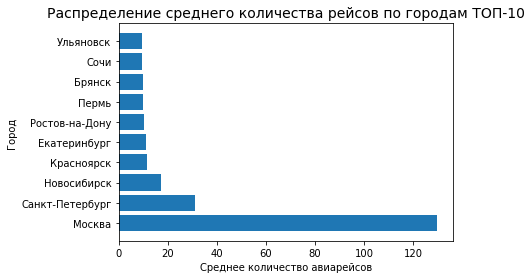

In [11]:
plt.barh(df_city_top_10['city'],df_city_top_10['average_flights'])
plt.xlabel("Среднее количество авиарейсов")
plt.ylabel("Город")
plt.title('Распределение среднего количества рейсов по городам ТОП-10', fontsize = 14);

Сформируем срез с ТОП-10 городов по среднему количеству авиарейсов и запишем его в датасет df_city_top_10. Построим гистограмму с распределением.  Распределение выглядит правдоподобно, в первой тройке -столица, Санкт-Петербург и Новосибирск. Но не совсем правдоподобно выглядит попадание в топ-10 по среднему количеству рейсов аэропортов Брянска и Ульяновска. Возможно в датасете есть ошибка.

In [12]:
df_city = df_city.sort_values(by = 'average_flights', ascending = False)

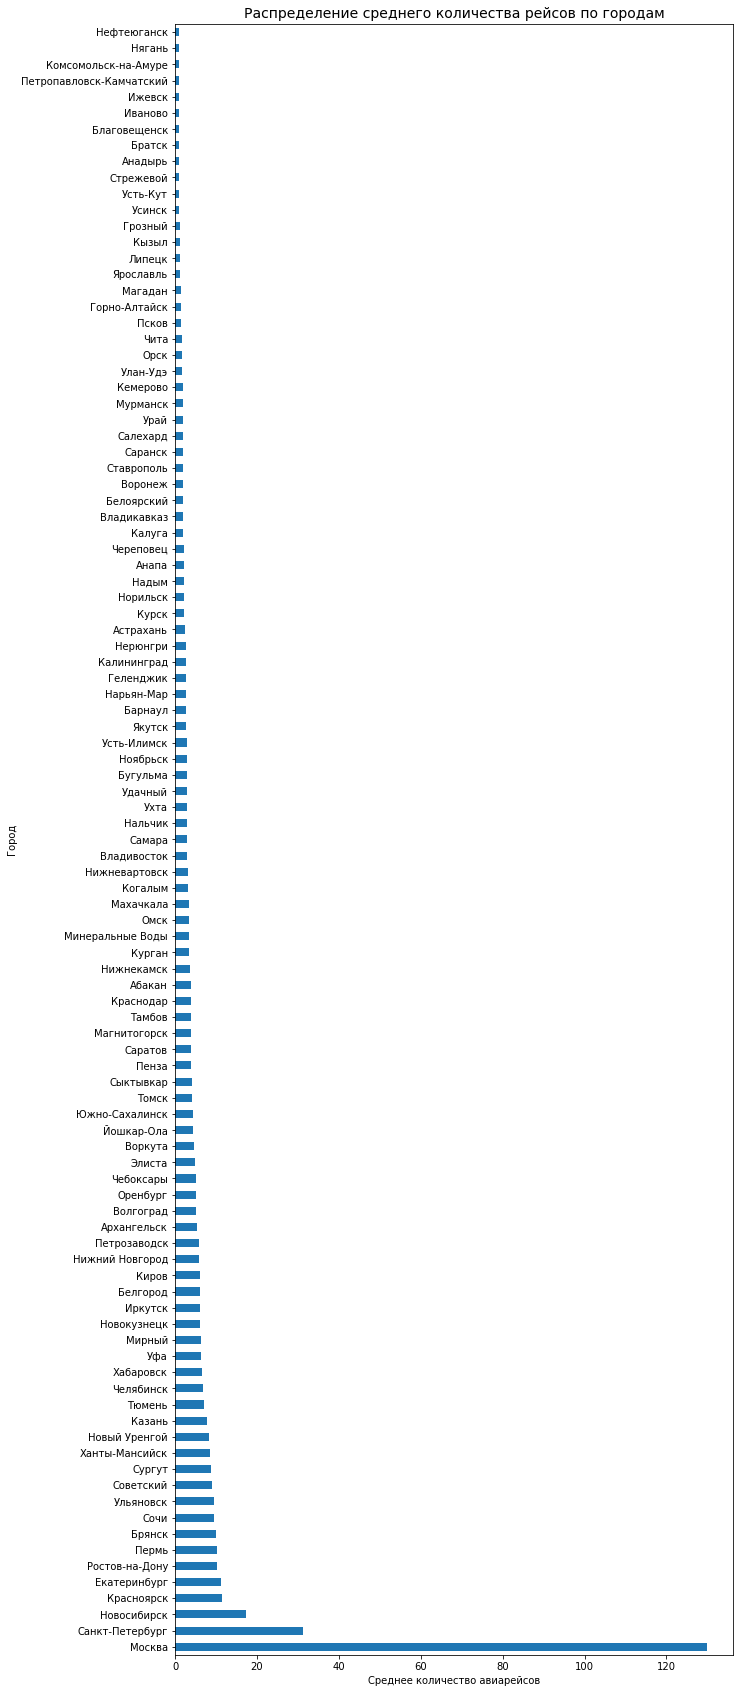

In [13]:
barh_qty_cities_total = df_city.plot(x = 'city', y ='average_flights', kind = 'barh', figsize = (10,30))
barh_qty_cities_total.set_xlabel("Среднее количество авиарейсов")
barh_qty_cities_total.set_ylabel("Город")
barh_qty_cities_total.legend().set_visible(False)
plt.title('Распределение среднего количества рейсов по городам', fontsize = 14);

Построим диаграмму распределения количества рейсов по всем городам датасета в целом. По ТОП-10 аэропортов комментарий был выше. Следующим блоком в рейтинге преимущественно идут крупные города Урала (Сургут, Ханты-Мансийск, Тюмень, Челябинск). Скорее всего это связано со сложной доступностью городов региона для наземного транспорта и развитой добывающей промышленностью. Наравне с ними в рейтинге столица Татарстана - Казань. О следующем блоке сложно что-то сказать, на первый взгляд закономерностей не прослеживается, в аэропортах с околомедианными значениями представлены самые различные регионы страны и в части географии и в части степени развитости региона. Замыкают рейтинг блок небольших и отдаленных сибирских,уральских и дальневосточных городов. 

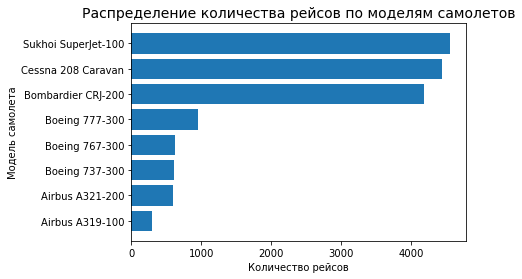

In [14]:
plt.barh(df_models['model'],df_models['flights_amount'].sort_values())
plt.xlabel("Количество рейсов")
plt.ylabel("Модель самолета")
plt.title('Распределение количества рейсов по моделям самолетов', fontsize = 14);

Проанализируем распределение моделей самолетов по количествам сделанных рейсов. График показывает, что безусловным лидером является отечественный Sukhoi SuperJet-100. Cessna 208 Caravan и Bombardier CRJ-200 находятся на втором и третьем местах по количеств рейсов. Но если Bombardier CRJ-200 как и Sukhoi SuperJet-100 являются полноценными пассажирскими самолетами с вместимостью салона 50 и более пассажиров, то Cessna - 9-13 местный легкий самолет, используемый на линиях малой длительности. В имеющихся датасетах мало данных для полноценного исследования, но возможно количество рейсов для Cessna 4557 -это ошибка в данных.
Следующий блок по количеству рейсов - это семейство лайнеров Boeing. На последнем месте - семейство Airbus. Данное распределение позволяет составить частичное представление о количественном распределении моделей в авиапарках компаний-перевозчиков.

## Общий вывод

Анализ распределения количества рейсов в зависимости от моделей самолетов показывает, что в датасете могут быть неточности. Если количество рейсов лидера аэробусов по рейсам - Sukhoi SuperJet-100 - выглядит правдоподобно, то наличие в первой тройке легкого 13-местного самолета Cessna выглядит как вброс.

Лидеры-города по количеству рейсов предсказуемы: Москва, Санкт-Петербург,  Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Сочи. Немного аномально выглядят попадание Брянска и Ульяновска в топ-10, но если в этих городах в августе 2018 проводились большие фестивали, увеличение количества рейсов выглядит более-менее правдоподобно.